<a href="https://colab.research.google.com/github/luisrevilla20/Reconocimiento_Patrones_RedesNeuronales/blob/main/1_AND_OR_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Perceptron Algorithm

A Perceptron is a system that learns using labeled examples of feature vectors, mapping these inputs to their corresponding output class labels. In its simplest form, a Perceptron contains N input nodes, one for each entry in the input row, followed by only one layer in the network with just a single node in that layer.

Training a Perceptron is a fairly straightforward operation. Our goal is to obtain a set of weights *w* that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector _w_ can be learned to linearly separate our two classes of data.

![Perceptron](https://drive.google.com/uc?id=1K7olbB11mSfAwPmB8BeeRNe6XbuGSK4D)

The pseudocode is the following:
1. Initialize our weight vector w with small random values
2. Until Perceptron converges
    1. Loop over each input and class label
    2. Take $x$ and pass it through the network, calculating the output value: $y = (w · x)$
    3. Update the weights: if ŷ = 0 --> $w_i = w_i + \alpha x_i$, if ŷ = 1 --> $w_i = w_i - \alpha x_i$
        

In [3]:
import random, math
import numpy as np
import matplotlib.pyplot as plt

## Perceptron
--- 


In [4]:
class Perceptron:        
    """Perceptron class

        Args:
            N: Number of variables
            M: Number of inputs
            alpha: Learning rate
        
        Attributes:
            W: The weights for the perceptron
            b: bias
            alpha: The learning rate
    """
    def __init__(self, N, alpha=0.1):        
        # Creates an array of N weights and initializes with random values
        self.W = np.array( [ random.uniform(-1, 1) for _ in range(N) ] )
        self.b = random.uniform(-1, 1)
        self.losses = []
        self.alpha = alpha
            
    def _sigmoid(self, x):
        return 1/(1+math.e**(-x))

    def _loss(self, y, y_hat):
        return -(y * math.log(y_hat, math.e) + (1-y) * math.log((1-y_hat), math.e))
    
    def predict(self, x):    
        """
            Makes a prediction for the specified input
            
            Args:
                x: Input to make a prediction on.
        """        
        return self._sigmoid( np.dot(x, self.W) + self.b)
    
    def perceptronStep(self, X, y):
        """
            The perceptron basic step. It updates the weights based on the input data.
            
            Args:
                X: Array with the input data
                y: Data labels
        """
        ds = [0] * len( self.W )
        db = 0
        for i in range( len(X) ):
            y_hat = self._sigmoid( np.dot(X[i], self.W) + self.b )
            d_y = y_hat - y[i][0]

            for j in range( len(ds) ):
                ds[j] += X[i][0] * d_y
            db += d_y

            self.losses.append( self._loss( y[i][0], y_hat ) )
        for k in range( len(ds) ):
            self.W[k] -= self.alpha * ds[k]
        self.b -= self.alpha * db
 
    def train(self, X, y, epochs = 10):
        """
            Runs the perceptron step a specified number of epochs
            
            Args:
                X: input data
                y: labels
                epochs: The number of times the step is executed
        """
        # loop over the desired epochs
        for epoch in range(epochs):
            self.perceptronStep(X, y)

    def plot_losses(self):
        plt.plot(self.losses)
        plt.show()

### Perceptron AND
-----


Initial weights [ 0.2788536  -0.94997849]
Weights after training [7.90425045 6.67541836]


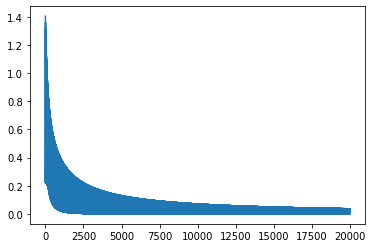

Predict [1,1]: 0.9637018344457611
Predict [1,0]: 0.03240804972625689
Predict [0,1]: 0.0097062106171914
Predict [0,0]: 1.236468130071135e-05


In [5]:
# change the seed to see different solutions
random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
X = np.array([[1,1],
                [1,0],
                [0,1],
                [0,0]])
y_labels = np.array([[1],
                    [0],
                    [0],
                    [0]])

p_AND = Perceptron( len(X[0]) )
print(f"Initial weights {p_AND.W}")

# Test training with different epochs
# Test training with different epochs
p_AND.train(X, y_labels, 5000)
print(f"Weights after training {p_AND.W}")

p_AND.plot_losses()

print('Predict [1,1]:', p_AND.predict( [1,1] ) )
print('Predict [1,0]:', p_AND.predict( [1,0] ) )
print('Predict [0,1]:', p_AND.predict( [0,1] ) )
print('Predict [0,0]:', p_AND.predict( [0,0] ) )

# Test your model with a prediction

### Perceptron OR
-----


Initial weights [ 0.2788536  -0.94997849]
Weights after training [9.42817461 8.19934252]


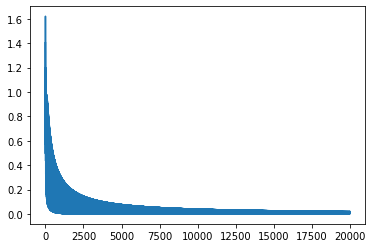

Predict [1,1]: 0.999998893862147
Predict [1,0]: 0.9959913833327255
Predict [0,1]: 0.9864330706079419
Predict [0,0]: 0.019591333112362636


In [6]:
# change the seed to see different solutions
random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation
X = np.array([[1,1],
                [1,0],
                [0,1],
                [0,0]])
y_labels = np.array([[1],
                    [1],
                    [1],
                    [0]])

p_OR = Perceptron( len(X[0]) )
print(f"Initial weights {p_OR.W}")

# Test training with different epochs
# Test training with different epochs
p_OR.train(X, y_labels, 5000)
print(f"Weights after training {p_OR.W}")

p_OR.plot_losses()

print('Predict [1,1]:', p_OR.predict( [1,1] ) )
print('Predict [1,0]:', p_OR.predict( [1,0] ) )
print('Predict [0,1]:', p_OR.predict( [0,1] ) )
print('Predict [0,0]:', p_OR.predict( [0,0] ) )
# Test your model with a prediction

### Numpy Perceptron
-----


In [13]:
class NumpyPerceptron:
    def __init__(self, N, alpha=0.1):        
        # Creates an array of N weights and initializes with random values
        self.N = N
        self.W = np.array( [ random.uniform(-1, 1) for _ in range(N) ] )
        self.b = random.uniform(-1, 1)
        self.losses = []
        self.alpha = alpha
            
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(1)**(-x))
    
    def _loss(self, y, y_hat):
        return -(y * np.log(y_hat) + (1-y) * np.log(1-y_hat))
    
    def predict(self, x):
        return self._sigmoid( np.dot(self.W, x) + self.b )
    
    def perceptronStep(self, X, y):
        dw = np.zeros( (self.N, 1) )
        db = 0
        error = 0

        y_hat = self._sigmoid( np.dot(self.W, X) + self.b )
        
        error = np.mean( np.sum(self._loss( y, y_hat )) )
        self.losses.append( error )
        
        d_y = y_hat - y
        
        mat_mul_dw = np.matmul(X, d_y.T)
        dw += mat_mul_dw
        dw /= len(X[0])
        dw *= self.alpha
        
        self.W = np.subtract( self.W , dw.T )

        db += np.sum(d_y)
        db /= len(X[0])
        self.b -= self.alpha * db

    def train(self, X, y, epochs = 10):
        for _ in range(epochs):
            self.perceptronStep(X, y)
            
    def plot_losses(self):
        plt.plot(self.losses)
        plt.show()

### Numpy Perceptron AND
-----

Initial weights [-0.94040556 -0.56272405]
Weights after training [[5.99274351 5.99274856]]


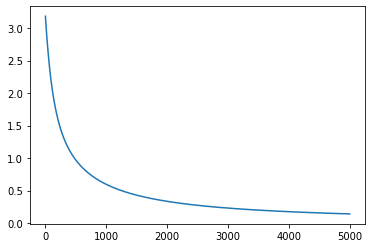

Predict [1,1]: [0.94369457]
Predict [1,0]: [0.0401661]
Predict [0,1]: [0.04016629]
Predict [0,0]: [0.00010447]


In [14]:
# The following data is used to train the perceptron for the AND operation
np.random.seed(42)
X = np.array([[1,1],
                [1,0],
                [0,1],
                [0,0]]).T
y_labels = np.array([[1],
                    [0],
                    [0],
                    [0]]).T
p_AND = NumpyPerceptron( len(X) )
print(f"Initial weights {p_AND.W}")

# Test training with different epochs
p_AND.train(X, y_labels, 5000)
print(f"Weights after training {p_AND.W}")

p_AND.plot_losses()

print('Predict [1,1]:', p_AND.predict( [1,1] ) )
print('Predict [1,0]:', p_AND.predict( [1,0] ) )
print('Predict [0,1]:', p_AND.predict( [0,1] ) )
print('Predict [0,0]:', p_AND.predict( [0,0] ) )

### Numpy Perceptron OR
-----

Initial weights [-0.94692806 -0.6023247 ]
Weights after training [[7.20470049 7.20549287]]


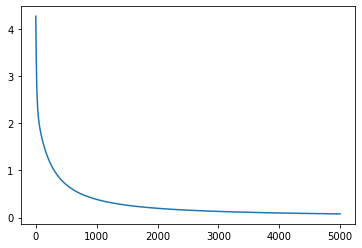

Predict [1,1]: [0.99998738]
Predict [1,0]: [0.98329186]
Predict [0,1]: [0.98330487]
Predict [0,0]: [0.04189902]


In [15]:
# The following data is used to train the perceptron for the AND operation
X = np.array([[1,1],
                [1,0],
                [0,1],
                [0,0]]).T
y_labels = np.array([[1],
                    [1],
                    [1],
                    [0]]).T

p_OR = NumpyPerceptron( 2 )
print(f"Initial weights {p_OR.W}")

# Test training with different epochs
p_OR.train(X, y_labels, 5000)
print(f"Weights after training {p_OR.W}")

p_OR.plot_losses()

print('Predict [1,1]:', p_OR.predict( [1,1] ) )
print('Predict [1,0]:', p_OR.predict( [1,0] ) )
print('Predict [0,1]:', p_OR.predict( [0,1] ) )
print('Predict [0,0]:', p_OR.predict( [0,0] ) )